In [1]:

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement
import functools


import assgn2 as asn



# Part B # Q6, This following cell implements question #6, which is the first question in Part B: Data Processing.

In [2]:

df = pd.read_csv('Dataset/winequality-red.csv',sep = ';')

# Part B # Q7: summarize  mean, standard deviation, and quartiles (For Report)

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Part B # Q8: Shuffle the rows of data, using df.sample to shuffle without losing column names

In [4]:
df = df.sample(frac=1) 

# Part B # Q9: Generate Pair Plots using seaborn package. Used to identify and report redundant features.

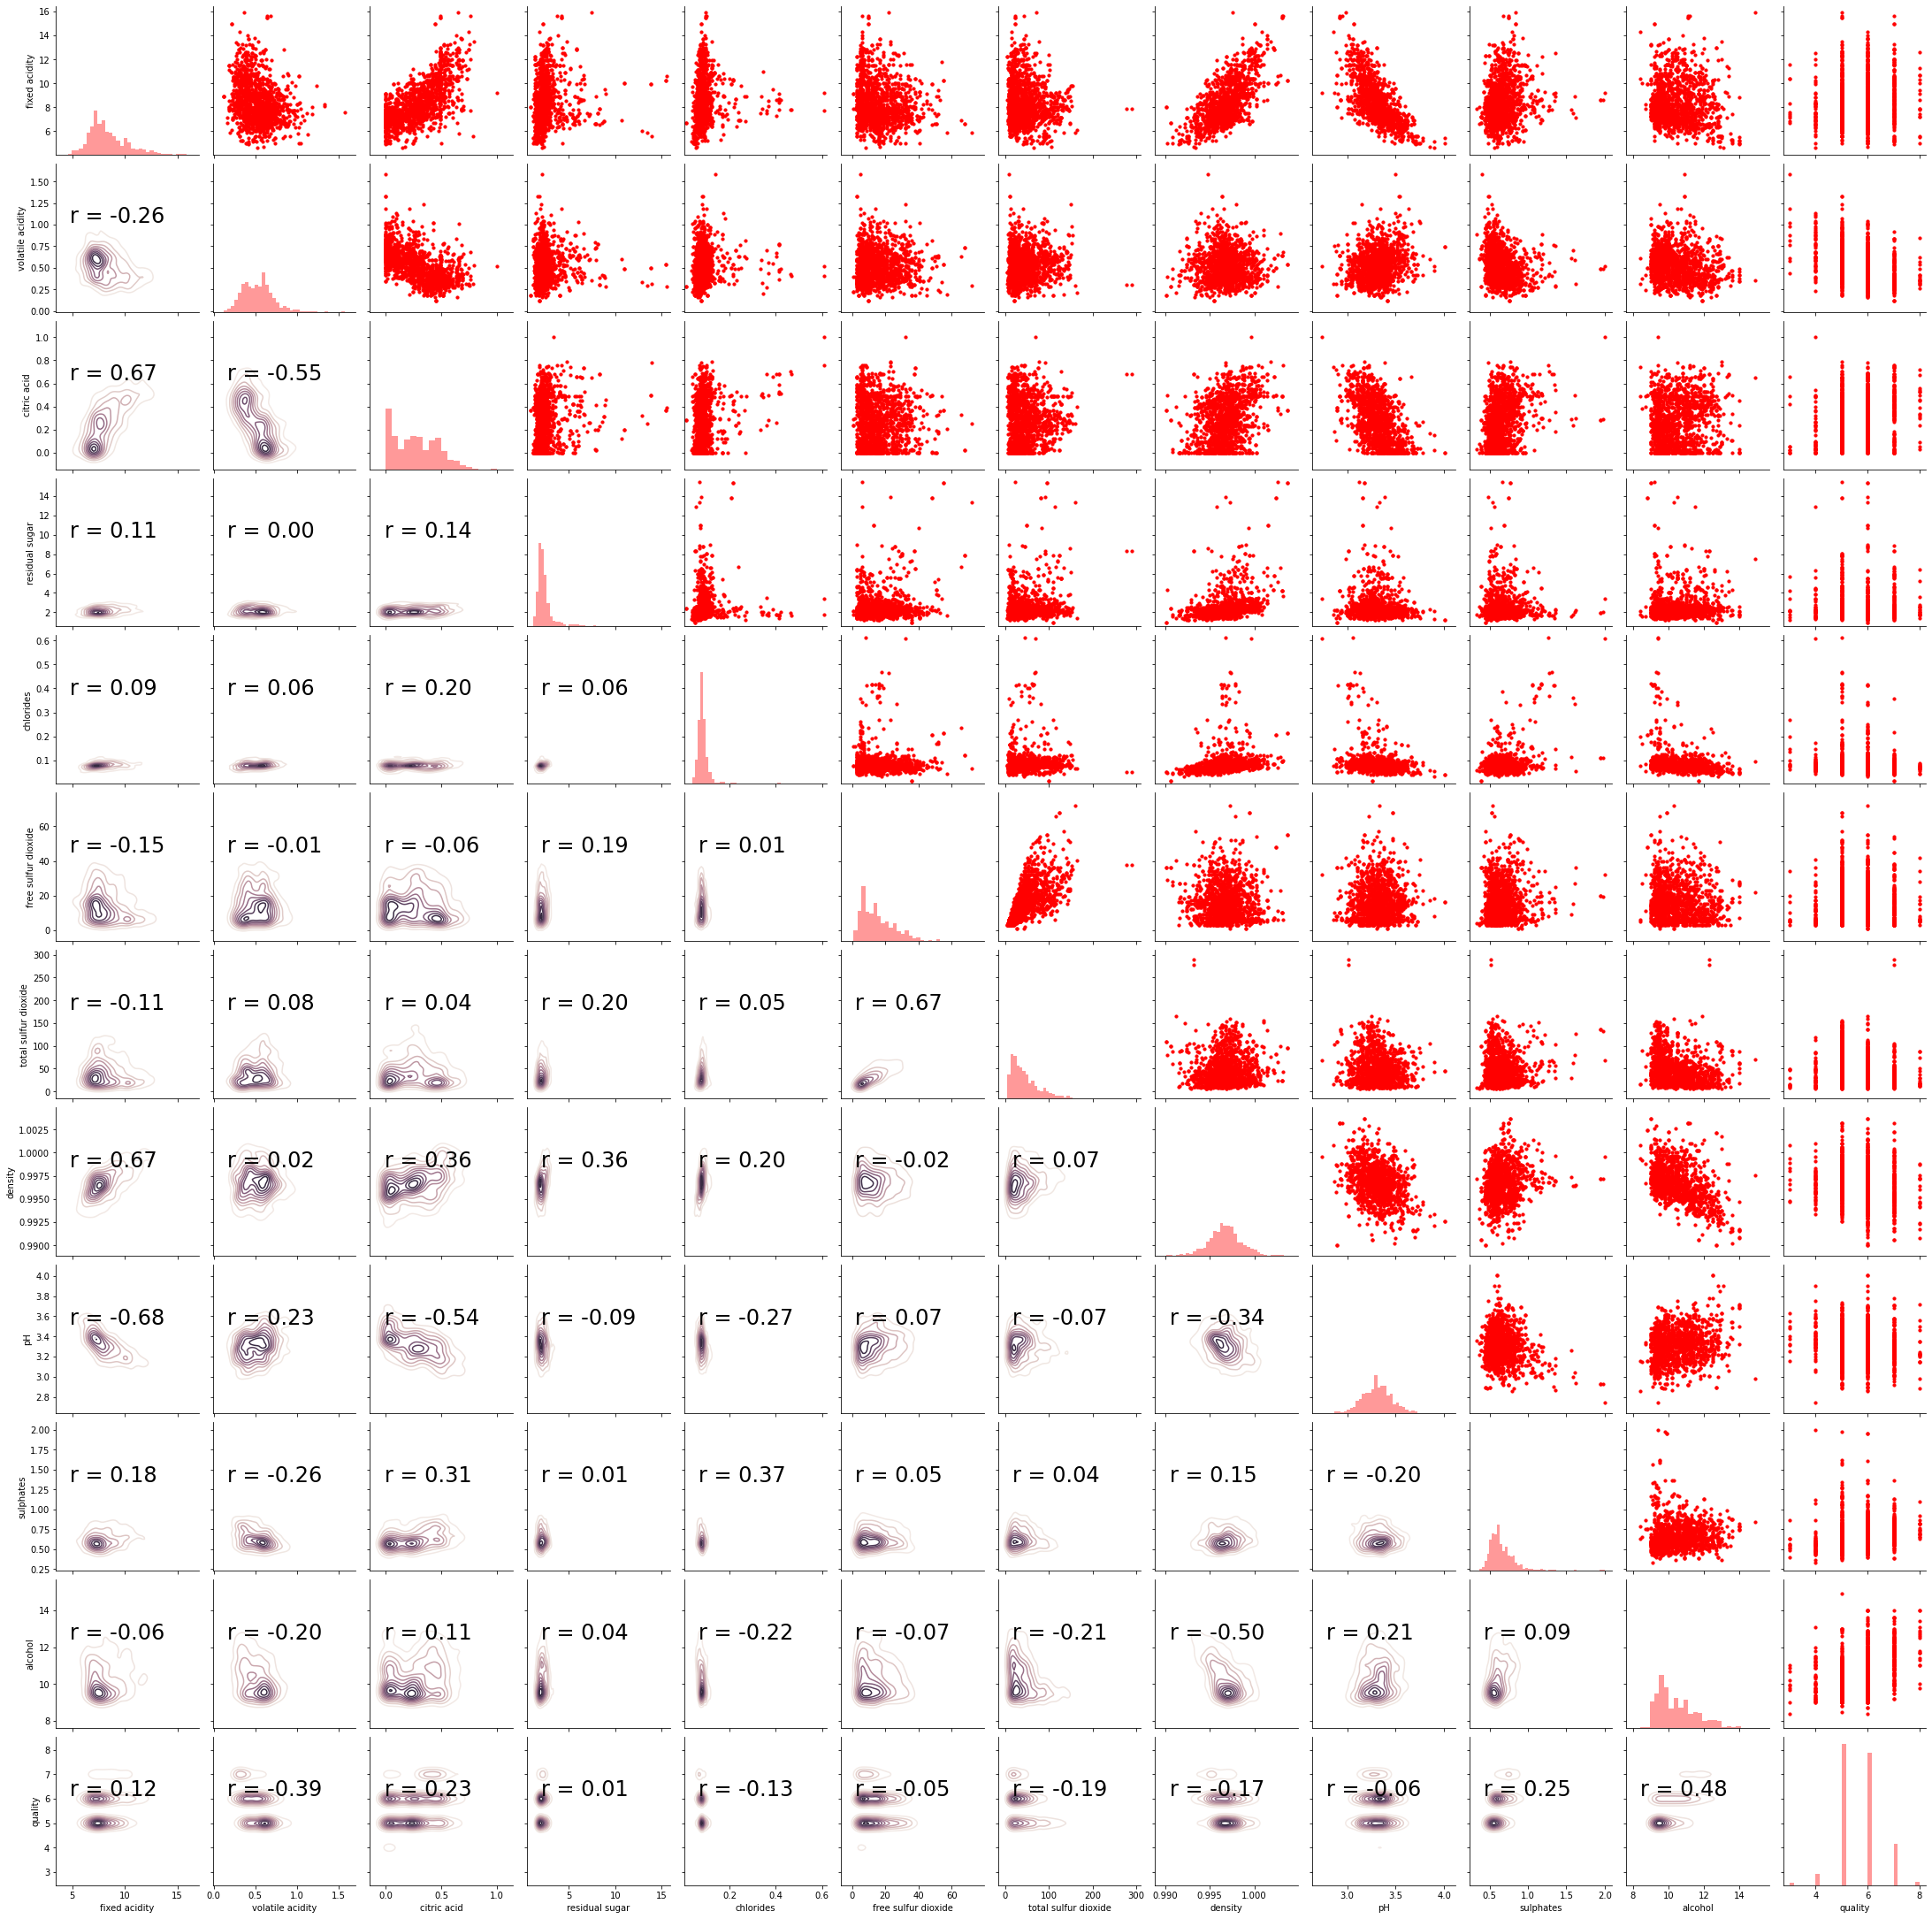

In [5]:

import warnings
warnings.filterwarnings('ignore')


# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);


In [6]:
X = df.drop(columns = 'quality') #data matrix
y = df['quality']  #quality

X = np.array(X)  # to np array 
y = np.array(y)   # to np array

In [7]:
best_features = ['volatile acidity', 'density', 'pH', 'sulphates', 'alcohol']
best_df = df[best_features]
X = np.array(best_df)

In [8]:
def split_trainTest(X,y,t):
    train_size = int((1-t) * X.shape[0])   
    return X[:train_size],X[train_size:],y[:train_size],y[train_size:]

In [9]:
X_train, X_test, y_train, y_test = split_trainTest(X,y,t=0.2)

In [10]:
X_train = (X_train - np.mean(X_train))/np.std(X_train)
X_test = (X_test - np.mean(X_test))/np.std(X_test)

# Part A Question #1: Implement asn.polynomialFeatures function to generate polynomial and interaction features for a given degree of the polynomial.
# Part A Question #2: Implement the function asn.mse to calculate and return the mean squared error of two vectors. The following cell includes the first implementation of this in our test script.

# Part A Question #5: Implementation of the Linear_Regression Model Class. Initial initialization of this is done in the following cell.

# Part C Question #10, steps a-e are done in this cell, and the next is where the optimal values are placed. This question is why the other questions are tested at this point.

In [11]:
x_train = asn.polynomialFeatures(X_train,1)
x_test = asn.polynomialFeatures(X_test,1)
validation_accuracy = np.empty((4,6,2))
lambd= [1.0, 0,0.1,0.01, 0.001, 0.0001]
learning_rate = [0.1, 0.01, 0.001, 0.001]
regularizer= ['l1', 'l2']
minScore = 1e10
for i,lr in enumerate(learning_rate):
    for j,ld in enumerate(lambd):
        for x,rg in enumerate(regularizer):
            lnreg = asn.Linear_Regression()
            model_args = {'learning_rate' : lr,'lambd':ld,'regularizer' : rg,'epochs' : 1000, 'tol' : 1e-3}
            result = asn.sFold(5,x_train,y_train,lnreg,error_fuction = asn.mse,**model_args)
            validation_accuracy[i,j,x] = result['Average error']
            if validation_accuracy[i,j,x] < minScore:
                minScore = validation_accuracy[i,j,x]
                index = [i,j,x]
            
                
                

In [12]:

print(index)
a,b,c = index
print('optimal learning_rate: ',learning_rate[a])
print('optimal lambd: ',lambd[b])
print('optimal regularizer: ',regularizer[c])
print('optimal value',validation_accuracy[a,b,c])


[0, 1, 0]
optimal learning_rate:  0.1
optimal lambd:  0
optimal regularizer:  l1
optimal value 0.5126376272762094


# Part C Question #15: The Stochastic Gradient Descent Linear Regression algorithm is used, as asn.SGD(). This is the first usage of this function in this script.

In [13]:

validation_accuracy = np.empty((4,6,2))
lambd= [1.0, 0,0.1,0.01, 0.001, 0.0001]
learning_rate = [0.1, 0.01, 0.001, 0.001]
regularizer= ['l1', 'l2']
minScore = 1e10
for i,lr in enumerate(learning_rate):
    for j,ld in enumerate(lambd):
        for x,rg in enumerate(regularizer):
            lnreg = asn.SGD()
            model_args = {'learning_rate' : lr,'lambd':ld,'regularizer' : rg,'epochs' : 1000,'tol' : 1e-3}
            result = asn.sFold(5,x_train,y_train,lnreg,error_fuction = asn.mse,**model_args)
            validation_accuracy[i,j,x] = result['Average error']
            if validation_accuracy[i,j,x] < minScore:
                minScore = validation_accuracy[i,j,x]
                index = [i,j,x]

In [14]:

print(index)
a,b,c = index
print('optimal learning_rate: ',learning_rate[a])
print('optimal lambd: ',lambd[b])
print('optimal regularizer: ',regularizer[c])
print('optimal value',validation_accuracy[a,b,c])

[0, 1, 0]
optimal learning_rate:  0.1
optimal lambd:  0
optimal regularizer:  l1
optimal value 15.87230314548051


# Part A Question #5: Implementation of the Linear_Regression Model Class. Part a) is tested, with the Linear_Regression.fit function, which implements batch gradient descent algorithm. Part b) is also tested with the Linear_Regression.predict function, which returns the 1d array of prediction for each row in "X".

# Part C Question #11, the model is evaluated on our test data, with the standard Linear Regression to find mse

In [15]:

linRg = asn.Linear_Regression()
linRg.fit(x_train,y_train,learning_rate=0.1,epochs=1000,regularizer='l1',lambd= 0., tol=1e-3)

y_test_predicted = linRg.predict(x_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted)) 

Test: Mean squared error: 0.54


# Part C Question #15 extra credit, model is evaluated with stochastic gradient descent linear regression, and the mse is reported. Because the Mean Squared Error is smaller than for the the batch gradient descent algorithm, the SGD seems to be the best model.

In [16]:

linRg2 = asn.SGD()
linRg2.fit(x_train,y_train,learning_rate=0.1,epochs=1000,regularizer='l2',lambd= 0.001, tol=1e-3)

y_test_predicted_sgd = linRg2.predict(x_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd)) 

Test: Mean squared error: 26.39


In [17]:
cv = 5
train_size = 100  

# Part A Question #3: Implement the asn.learning_curve function, which computes training and validation errors, an dreturns two arrays containing training and validation rmse values.


In [18]:
# testing learning curve function
train_scores, val_scores, train_sizes,_ = asn.learning_curve(asn.Linear_Regression, x_train, y_train, cv, train_size = train_size, learning_rate = 0.1, 
               epochs = 1000, tol = 1e-5, regularizer = 'l1', lambd = 0)

# Part C Question #12: The learning_curve function is used to help create the rmse values, and in the following cell, the learning curve is plotted using our best model.

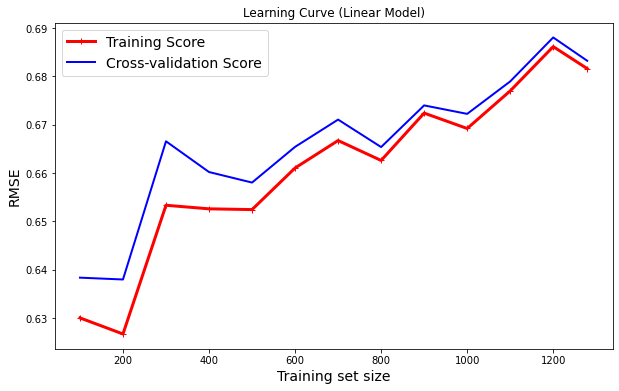

In [19]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores)
train_std = np.std(train_scores)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores)
val_std = np.std(val_scores)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, "r-+", linewidth=3, label="Training Score")
plt.plot(train_sizes, val_scores, "b-", linewidth=2, label="Cross-validation Score")
plt.legend(loc="best", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("RMSE", fontsize=14) 
plt.title("Learning Curve (Linear Model)")
plt.show()

# Part C Question #13: The following 5 cells are used to determine the best hyperparameter values for the training data matrix with a polynomial degree 3, and the learning curve is plot using the rmse values from the learning_curve function.

In [20]:
x3_train = asn.polynomialFeatures(X_train,3)
x3_test = asn.polynomialFeatures(X_test,3)

In [21]:
model = asn.Linear_Regression()
model.fit(x3_train,y_train,learning_rate=0.01,epochs=1000,regularizer='l2',lambd= 15, tol=1e-3)

In [22]:

y_train_predicted = model.predict(x3_train)
print(y_train_predicted)
y_test_predicted = model.predict(x3_test)
print("Training: Mean squared error: %.2f"
      % asn.mse(y_train, y_train_predicted))

print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted))

[5.83221047 6.24028258 5.72607296 ... 5.554438   4.93998169 6.3382267 ]
Training: Mean squared error: 0.53
Test: Mean squared error: 0.60


In [23]:
# testing learning curve function
train_scores3, val_scores3, train_sizes3,_ = asn.learning_curve(asn.Linear_Regression, x3_train, y_train, cv, train_size = train_size, learning_rate = 0.01, 
               epochs = 1000, tol = 1e-3, regularizer = 'l2', lambd = 0.1)

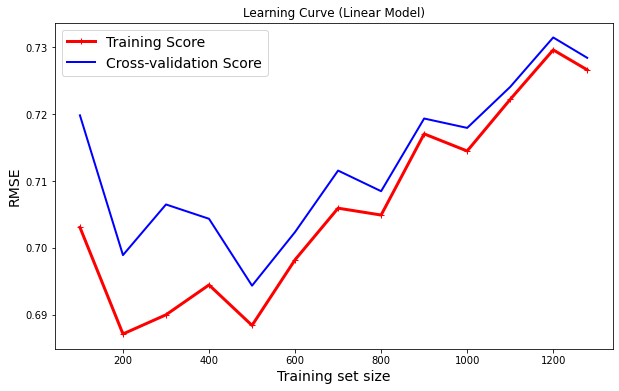

In [24]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores3)
train_std = np.std(train_scores3)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores3)
val_std = np.std(val_scores3)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes3, train_scores3, "r-+", linewidth=3, label="Training Score")
plt.plot(train_sizes3, val_scores3, "b-", linewidth=2, label="Cross-validation Score")
plt.legend(loc="best", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("RMSE", fontsize=14) 
plt.title("Learning Curve (Linear Model)")
plt.show()

# Part A Question #4: Implement asn.plot_polynomial_model_complexity function, which plots training and validation rmse values of the data matrix X for polynomial degrees from 1 up to maxPolynomialDegree.

# Part C Question #14: The implemented plot_polynomial_model_complexity function is used to plot the rmse values for the training and validation folds for polynomial degrees 1-5. The previous training data is used as the input for this function, and hte hyperparameter values are chosen judiciously so as to work with the higher-degree models.

X shape = (1279, 6) #### learning_rate = 0.1   ##### Degree = 1 ## epoch:1000
X shape = (1279, 21) #### learning_rate = 0.010000000000000002   ##### Degree = 2 ## epoch:1000
X shape = (1279, 56) #### learning_rate = 0.0010000000000000002   ##### Degree = 3 ## epoch:1000
X shape = (1279, 126) #### learning_rate = 0.00010000000000000003   ##### Degree = 4 ## epoch:1000
X shape = (1279, 252) #### learning_rate = 1.0000000000000004e-05   ##### Degree = 5 ## epoch:1000


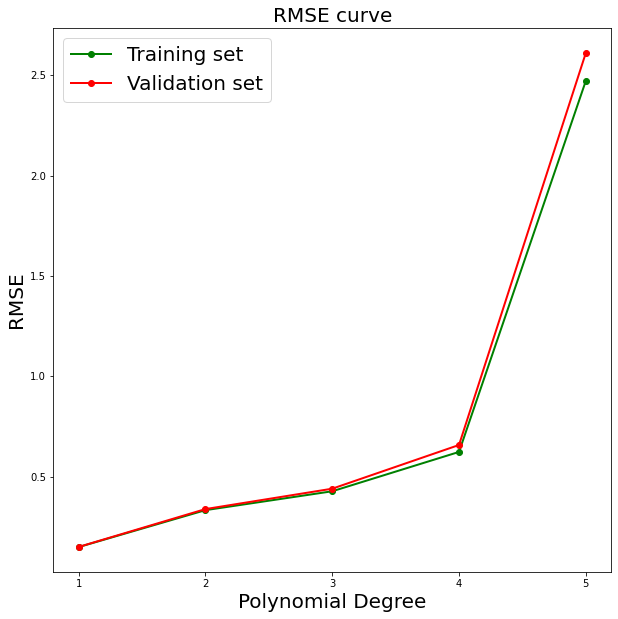

In [25]:
maxPolynomialDegree = 5
asn.plot_polynomial_model_complexity(asn.Linear_Regression, X_train, y_train, cv, maxPolynomialDegree, 
                                     learning_rate=0.1, epochs=1000, tol=1e-3, regularizer=None, lambd=0)

In [26]:
x_train = asn.polynomialFeatures(X_train,1)
x_test = asn.polynomialFeatures(X_test,1)
linRg = asn.Linear_Regression()
linRg.fit(x_train,y_train,learning_rate=0.1,epochs=1000,regularizer='l1',lambd= 0., tol=1e-3)

y_test_predicted_sgd = linRg.predict(x_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd)) 

Test: Mean squared error: 0.54


In [27]:
linRg.theta

array([ 0.94601007, -0.66995039, -0.54582058,  0.02878096, -0.62530576,
        1.80612658])

In [28]:
linRg2 = asn.Linear_Regression()
linRg2.fit(x_train,y_train,learning_rate=0.01,epochs=1000,regularizer='l1',lambd= 0., tol=1e-3)

y_test_predicted_sgd = linRg2.predict(x_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd))

Test: Mean squared error: 0.56


In [29]:
linRg2.theta

array([ 0.93307076, -0.66068782, -0.53835557,  0.02845861, -0.61683448,
        1.78181342])

In [30]:
x_train = asn.polynomialFeatures(X_train,1)
x_test = asn.polynomialFeatures(X_test,1)

In [31]:

linRg3 = asn.SGD()
linRg3.fit(x_train,y_train,learning_rate=0.1,epochs=1000,regularizer='l2',lambd= 0.001, tol=1e-3)

y_test_predicted_sgd = linRg3.predict(x_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd)) 

Test: Mean squared error: 26.39


In [32]:
linRg3.theta

array([ 0.10300323, -0.0727287 , -0.05940312,  0.00311384, -0.06696756,
        0.20837653])

In [33]:

linRg5 = asn.SGD()
linRg5.fit(x_train,y_train,learning_rate=0.01,epochs=1000,regularizer='l2',lambd= 0.001, tol=1e-3)

y_test_predicted_sgd = linRg5.predict(x_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd)) 

Test: Mean squared error: 26.39


In [34]:
linRg5.theta

array([ 0.10300323, -0.0727287 , -0.05940312,  0.00311384, -0.06696756,
        0.20837653])

In [35]:

linRg4 = asn.SGD()
linRg4.fit(x_train,y_train,learning_rate=0.001,epochs=1000,regularizer='l2',lambd= 0.001, tol=1e-3)

y_test_predicted_sgd = linRg4.predict(x_test)
print("Test: Mean squared error: %.2f"
      % asn.mse(y_test, y_test_predicted_sgd)) 

Test: Mean squared error: 26.39


In [36]:
linRg4.theta

array([ 0.10300323, -0.0727287 , -0.05940312,  0.00311384, -0.06696756,
        0.20837653])